In [1]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [2]:
from pyTVDN import TVDNDetect
from pathlib import Path
from scipy.io import loadmat
from scipy.signal import detrend
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
resDir = Path("../results")
dataDir = Path("../data/MEG_DKRegion_TimeCourses")

In [4]:
datFils = list(dataDir.glob("*.mat"))

In [5]:
datFils

[PosixPath('../data/MEG_DKRegion_TimeCourses/lcmv_result_R2868E_02-st_DKregion10.mat'),
 PosixPath('../data/MEG_DKRegion_TimeCourses/lcmv_result_R2868E_02-st_DKregion20.mat'),
 PosixPath('../data/MEG_DKRegion_TimeCourses/lcmv_result_R2868E_02-st_DKregionmin.mat'),
 PosixPath('../data/MEG_DKRegion_TimeCourses/lcmv_result_R2868E_03-st_DKregion10.mat'),
 PosixPath('../data/MEG_DKRegion_TimeCourses/lcmv_result_R2868E_03-st_DKregion20.mat'),
 PosixPath('../data/MEG_DKRegion_TimeCourses/lcmv_result_R2868E_03-st_DKregionmin.mat')]

In [6]:
from scipy.signal import lfilter, firls, decimate

In [7]:
q = 10

## 1 Data 02, 10mm

In [8]:
idx = 0
print(datFils[idx])

../data/MEG_DKRegion_TimeCourses/lcmv_result_R2868E_02-st_DKregion10.mat


In [9]:
MEG = loadmat(datFils[idx])

In [10]:
data = MEG["DK_timecourse"]

The time course is 60 seconds, so the frequency is 1200 Hz

In [11]:
d, n = data.shape

### Four sample sequences of the data

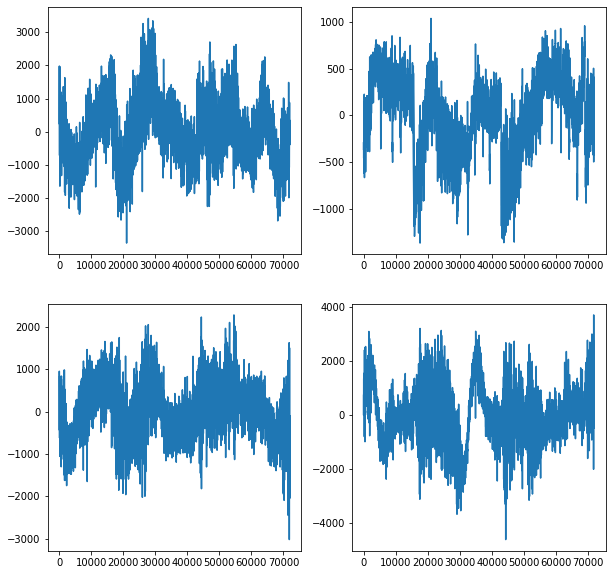

In [12]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.plot(data[1, :])

plt.subplot(222)
plt.plot(data[5, :])

plt.subplot(223)
plt.plot(data[15, :])

plt.subplot(224)
plt.plot(data[45, :])

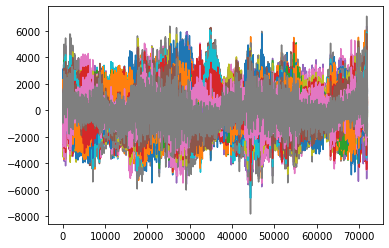

In [13]:
for i in range(d):
    plt.plot(data[i, :])

###  Data preprocessing

In [14]:
dataN = decimate(data, q=q)

In [15]:
dataN = detrend(dataN)

### HPF 

In [16]:
fs = 120 #sampling frequency
fmin = 2 # 2Hz - 45Hz signal range, filter for this with hbp
fmax = 45
hbp = firls(101, np.array([0, 0.2*fmin, 0.9*fmin, fmax-2, fmax+5, 60])*2/fs,
           desired = np.array([0, 0, 1, 1, 0, 0])) #for detrending, a bandpass

In [17]:
dataHPF = lfilter(hbp, 1, dataN)

### Four sequences of the data after HPF

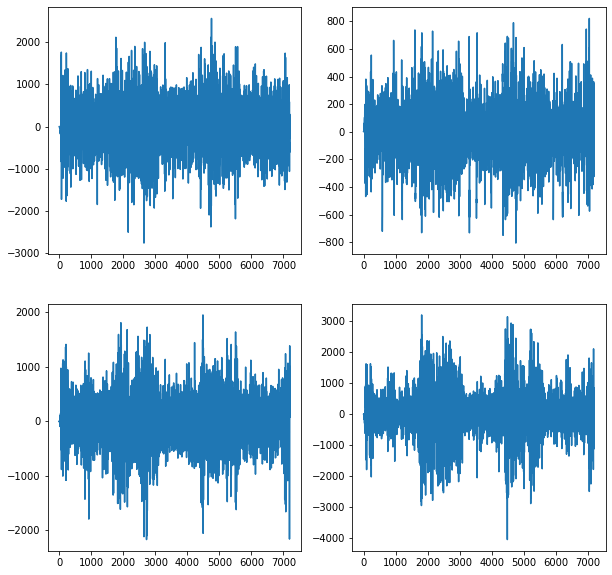

In [18]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.plot(dataHPF[1, :])

plt.subplot(222)
plt.plot(dataHPF[5, :])

plt.subplot(223)
plt.plot(dataHPF[15, :])

plt.subplot(224)
plt.plot(dataHPF[45, :])

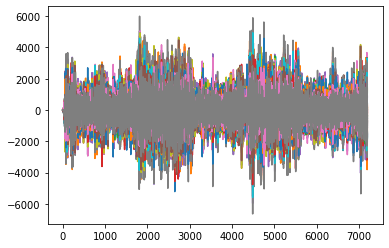

In [19]:
for i in range(d):
    plt.plot(dataHPF[i, :])

## 2 Data 02, 20mm

In [20]:
idx = 1
print(datFils[idx])

../data/MEG_DKRegion_TimeCourses/lcmv_result_R2868E_02-st_DKregion20.mat


In [21]:
MEG = loadmat(datFils[idx])

In [22]:
data = MEG["DK_timecourse"]

The time course is 60 seconds, so the frequency is 1200 Hz

In [23]:
d, n = data.shape

### Four sample sequences of the data

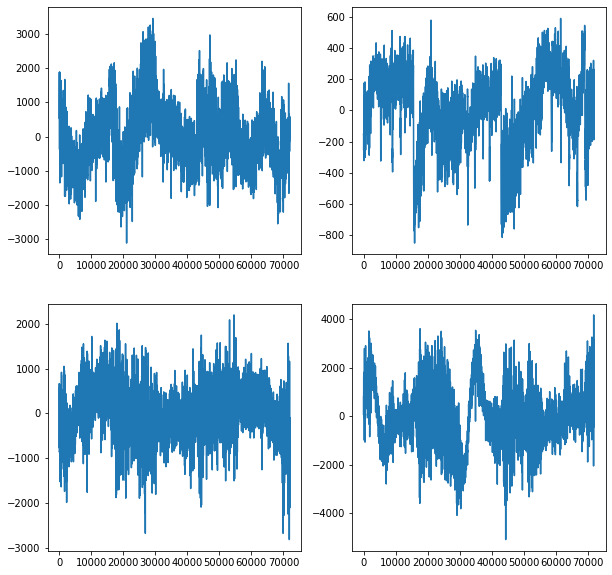

In [24]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.plot(data[1, :])

plt.subplot(222)
plt.plot(data[5, :])

plt.subplot(223)
plt.plot(data[15, :])

plt.subplot(224)
plt.plot(data[45, :])

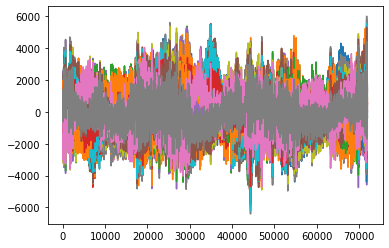

In [25]:
for i in range(d):
    plt.plot(data[i, :])

###  Data preprocessing

In [26]:
dataN = decimate(data, q=q)

In [27]:
dataN = detrend(dataN)

### HPF 

In [28]:
fs = 120 #sampling frequency
fmin = 2 # 2Hz - 45Hz signal range, filter for this with hbp
fmax = 45
hbp = firls(101, np.array([0, 0.2*fmin, 0.9*fmin, fmax-2, fmax+5, 60])*2/fs,
           desired = np.array([0, 0, 1, 1, 0, 0])) #for detrending, a bandpass

In [29]:
dataHPF = lfilter(hbp, 1, dataN)

### Four sequences of the data after HPF

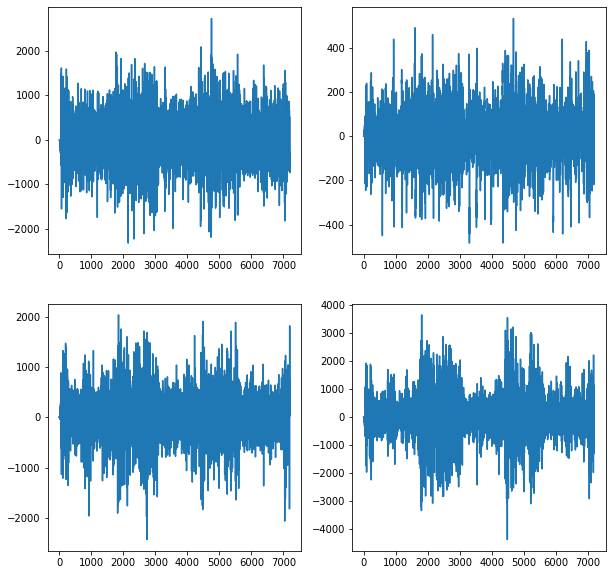

In [30]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.plot(dataHPF[1, :])

plt.subplot(222)
plt.plot(dataHPF[5, :])

plt.subplot(223)
plt.plot(dataHPF[15, :])

plt.subplot(224)
plt.plot(dataHPF[45, :])

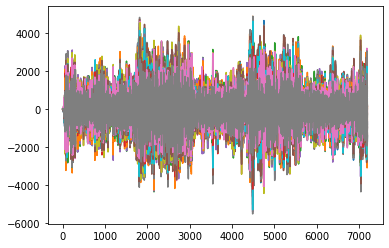

In [31]:
for i in range(d):
    plt.plot(dataHPF[i, :])

## 3 Data 02, min

In [8]:
idx = 2
print(datFils[idx])

../data/MEG_DKRegion_TimeCourses/lcmv_result_R2868E_02-st_DKregionmin.mat


In [9]:
MEG = loadmat(datFils[idx])

In [10]:
data = MEG["DK_timecourse"]

The time course is 60 seconds, so the frequency is 1200 Hz

In [11]:
d, n = data.shape

In [12]:
n

72000

### Four sample sequences of the data

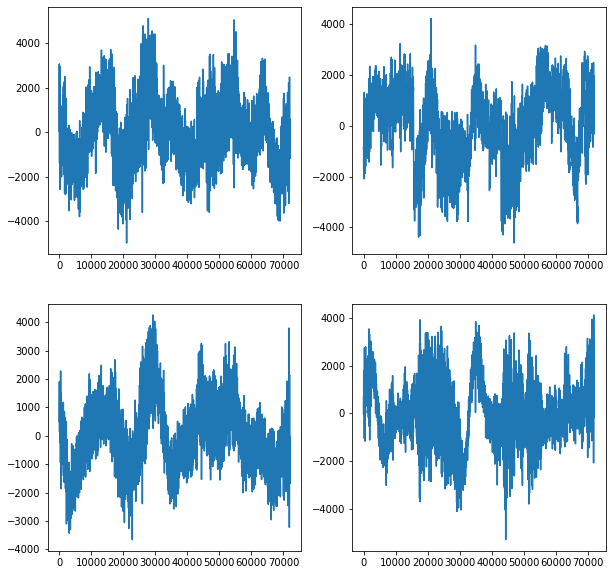

In [36]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.plot(data[1, :])

plt.subplot(222)
plt.plot(data[5, :])

plt.subplot(223)
plt.plot(data[15, :])

plt.subplot(224)
plt.plot(data[45, :])

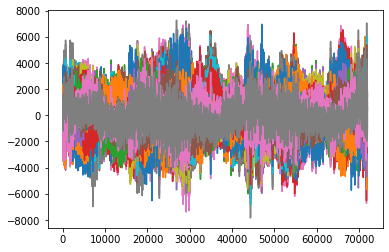

In [37]:
for i in range(d):
    plt.plot(data[i, :])

###  Data preprocessing

In [38]:
dataN = decimate(data, q=q)

In [39]:
dataN = detrend(dataN)

### HPF 

In [40]:
fs = 120 #sampling frequency
fmin = 2 # 2Hz - 45Hz signal range, filter for this with hbp
fmax = 45
hbp = firls(101, np.array([0, 0.2*fmin, 0.9*fmin, fmax-2, fmax+5, 60])*2/fs,
           desired = np.array([0, 0, 1, 1, 0, 0])) #for detrending, a bandpass

In [41]:
dataHPF = lfilter(hbp, 1, dataN)

### Four sequences of the data after HPF

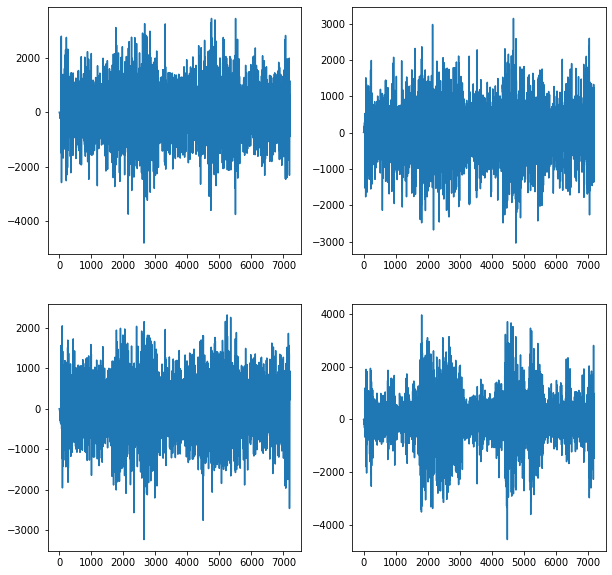

In [42]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.plot(dataHPF[1, :])

plt.subplot(222)
plt.plot(dataHPF[5, :])

plt.subplot(223)
plt.plot(dataHPF[15, :])

plt.subplot(224)
plt.plot(dataHPF[45, :])

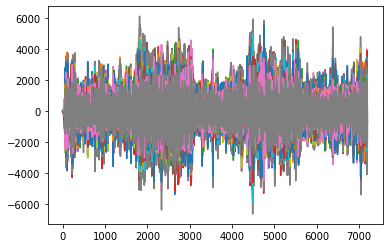

In [43]:
for i in range(d):
    plt.plot(dataHPF[i, :])

## 4 Data 03, 10 mm

In [44]:
idx = 3
print(datFils[idx])

../data/MEG_DKRegion_TimeCourses/lcmv_result_R2868E_03-st_DKregion10.mat


In [45]:
MEG = loadmat(datFils[idx])

In [46]:
data = MEG["DK_timecourse"]

The time course is 60 seconds, so the frequency is 1200 Hz

In [47]:
d, n = data.shape

### Four sample sequences of the data

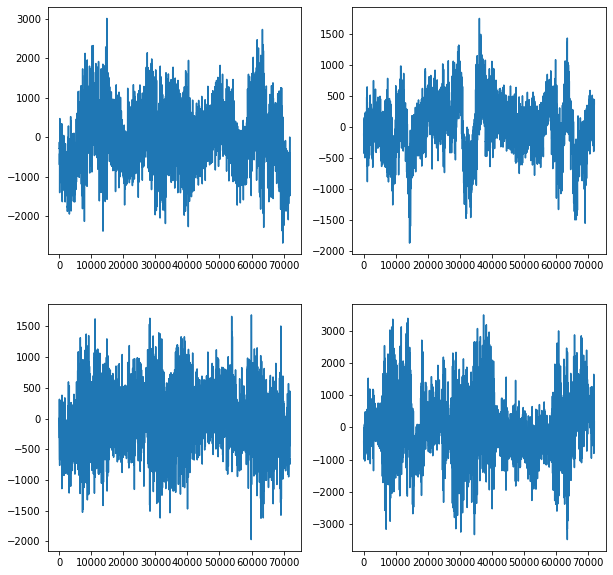

In [48]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.plot(data[1, :])

plt.subplot(222)
plt.plot(data[5, :])

plt.subplot(223)
plt.plot(data[15, :])

plt.subplot(224)
plt.plot(data[45, :])

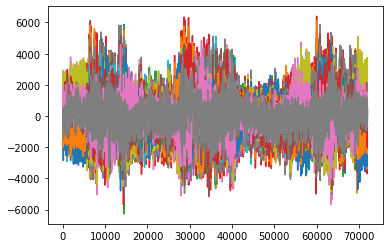

In [49]:
for i in range(d):
    plt.plot(data[i, :])

###  Data preprocessing

In [50]:
dataN = decimate(data, q=q)

In [51]:
dataN = detrend(dataN)

### HPF 

In [52]:
fs = 120 #sampling frequency
fmin = 2 # 2Hz - 45Hz signal range, filter for this with hbp
fmax = 45
hbp = firls(101, np.array([0, 0.2*fmin, 0.9*fmin, fmax-2, fmax+5, 60])*2/fs,
           desired = np.array([0, 0, 1, 1, 0, 0])) #for detrending, a bandpass

In [53]:
dataHPF = lfilter(hbp, 1, dataN)

### Four sequences of the data after HPF

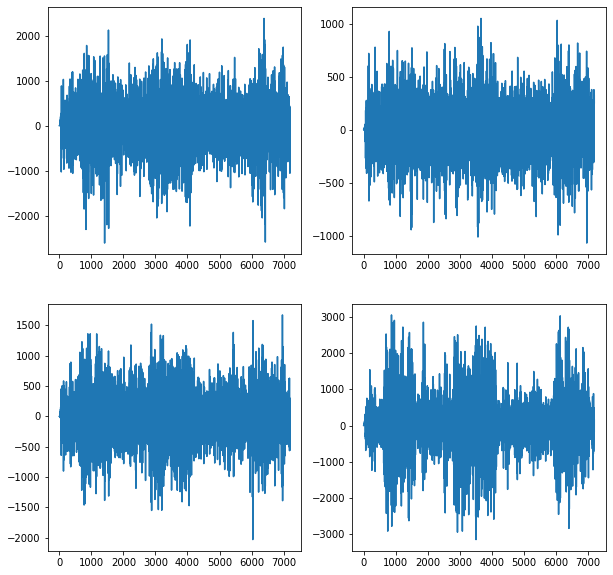

In [54]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.plot(dataHPF[1, :])

plt.subplot(222)
plt.plot(dataHPF[5, :])

plt.subplot(223)
plt.plot(dataHPF[15, :])

plt.subplot(224)
plt.plot(dataHPF[45, :])

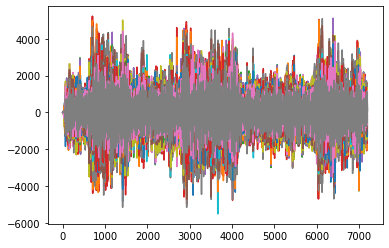

In [55]:
for i in range(d):
    plt.plot(dataHPF[i, :])

## 5 Data 03, 20 mm

In [56]:
idx = 4
print(datFils[idx])

../data/MEG_DKRegion_TimeCourses/lcmv_result_R2868E_03-st_DKregion20.mat


In [57]:
MEG = loadmat(datFils[idx])

In [58]:
data = MEG["DK_timecourse"]

The time course is 60 seconds, so the frequency is 1200 Hz

In [59]:
d, n = data.shape

### Four sample sequences of the data

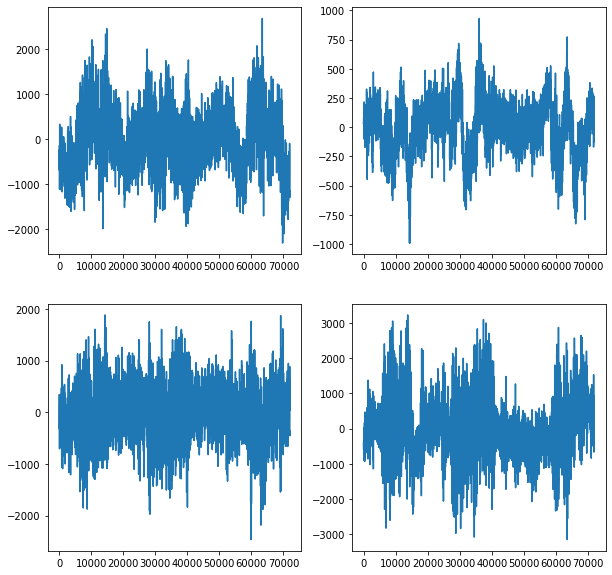

In [60]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.plot(data[1, :])

plt.subplot(222)
plt.plot(data[5, :])

plt.subplot(223)
plt.plot(data[15, :])

plt.subplot(224)
plt.plot(data[45, :])

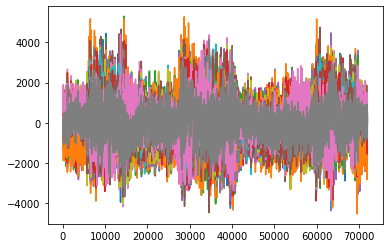

In [61]:
for i in range(d):
    plt.plot(data[i, :])

###  Data preprocessing

In [62]:
dataN = decimate(data, q=q)

In [63]:
dataN = detrend(dataN)

### HPF 

In [64]:
fs = 120 #sampling frequency
fmin = 2 # 2Hz - 45Hz signal range, filter for this with hbp
fmax = 45
hbp = firls(101, np.array([0, 0.2*fmin, 0.9*fmin, fmax-2, fmax+5, 60])*2/fs,
           desired = np.array([0, 0, 1, 1, 0, 0])) #for detrending, a bandpass

In [65]:
dataHPF = lfilter(hbp, 1, dataN)

### Four sequences of the data after HPF

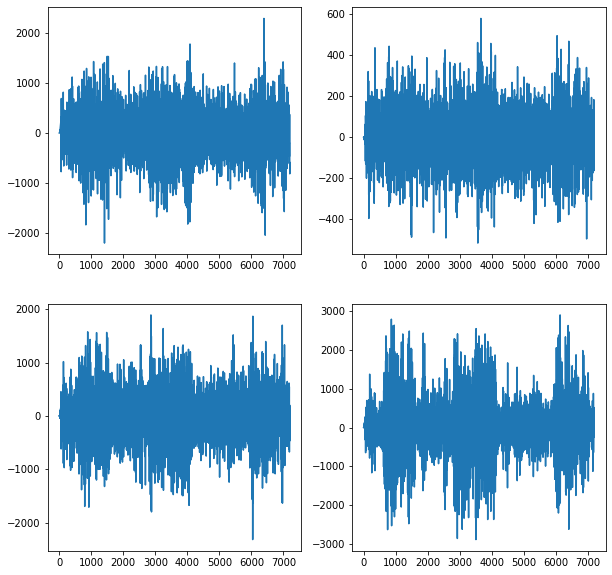

In [66]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.plot(dataHPF[1, :])

plt.subplot(222)
plt.plot(dataHPF[5, :])

plt.subplot(223)
plt.plot(dataHPF[15, :])

plt.subplot(224)
plt.plot(dataHPF[45, :])

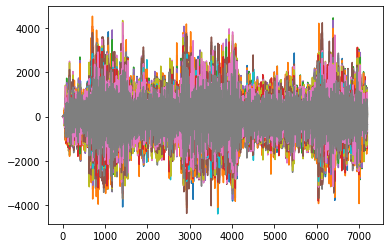

In [67]:
for i in range(d):
    plt.plot(dataHPF[i, :])

## 6 Data 03, min

In [68]:
idx = 5
print(datFils[idx])

../data/MEG_DKRegion_TimeCourses/lcmv_result_R2868E_03-st_DKregionmin.mat


In [69]:
MEG = loadmat(datFils[idx])

In [70]:
data = MEG["DK_timecourse"]

The time course is 60 seconds, so the frequency is 1200 Hz

In [71]:
d, n = data.shape

### Four sample sequences of the data

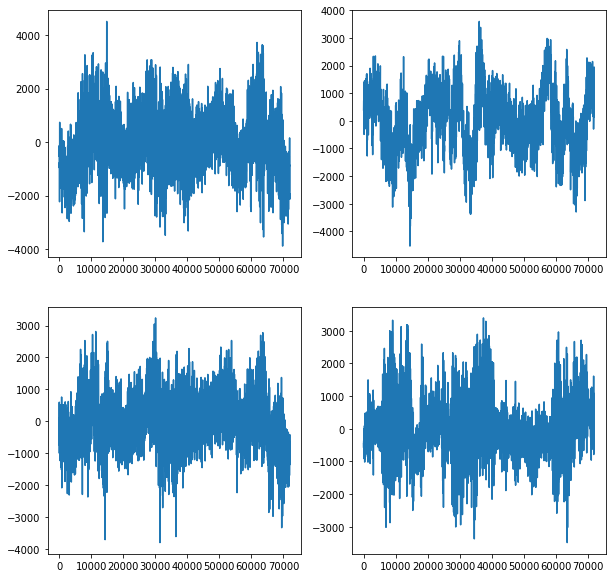

In [72]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.plot(data[1, :])

plt.subplot(222)
plt.plot(data[5, :])

plt.subplot(223)
plt.plot(data[15, :])

plt.subplot(224)
plt.plot(data[45, :])

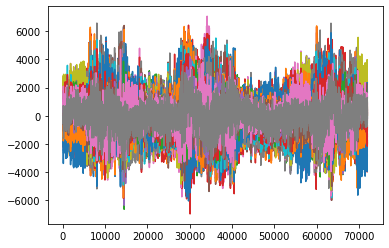

In [73]:
for i in range(d):
    plt.plot(data[i, :])

###  Data preprocessing

In [74]:
dataN = decimate(data, q=q)

In [75]:
dataN = detrend(dataN)

### HPF 

In [76]:
fs = 120 #sampling frequency
fmin = 2 # 2Hz - 45Hz signal range, filter for this with hbp
fmax = 45
hbp = firls(101, np.array([0, 0.2*fmin, 0.9*fmin, fmax-2, fmax+5, 60])*2/fs,
           desired = np.array([0, 0, 1, 1, 0, 0])) #for detrending, a bandpass

In [77]:
dataHPF = lfilter(hbp, 1, dataN)

### Four sequences of the data after HPF

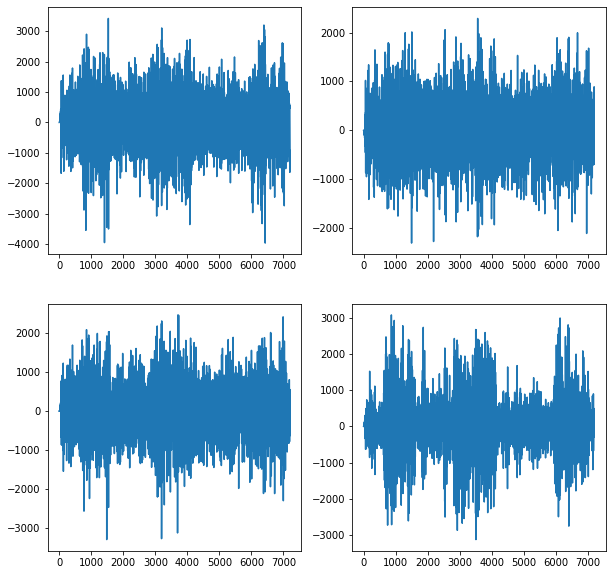

In [78]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.plot(dataHPF[1, :])

plt.subplot(222)
plt.plot(dataHPF[5, :])

plt.subplot(223)
plt.plot(dataHPF[15, :])

plt.subplot(224)
plt.plot(dataHPF[45, :])

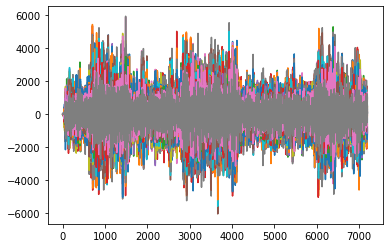

In [79]:
for i in range(d):
    plt.plot(dataHPF[i, :])